In [1]:
%matplotlib inline



# Baseline Correction

Baseline Correction, like in SeismoSignal, consists in (i) determining, through regression analysis
(least-squares-fit method), the polynomial curve that best fits the time-acceleration pairs
of values and then (ii) subtracting from the actual acceleration values their corresponding counterparts
as obtained with the regression-derived equation.
In this manner, spurious baseline trends, usually well noticeable in the displacement time-history
obtained from double time-integration of uncorrected acceleration records,
are removed from the input motion.

see :func:`gmspy.baselinecorr`.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

import gmspy as gm

load "kobe" records



In [3]:
ts, acc = gm.load_gm_examples('Kobe')
dt = ts[1] - ts[0]

Obtain uncorrected velocity and displacement sequences by direct integration



In [4]:
vel = cumulative_trapezoid(acc, ts, initial=0)
disp = cumulative_trapezoid(vel, ts, initial=0)
plot_obj_ori = [acc, vel, disp]

Obtain corrected time histories by different polynomial degrees



In [5]:
plot_obj_corr = []
degrees = [0, 1, 2, 3]
for i, degree in enumerate(degrees):
    acc_corr, vel_corr, disp_corr = gm.baselinecorr(ts,
                                                    acc,
                                                    degree,
                                                    plot=False)
    plot_obj_corr.append([acc_corr, vel_corr, disp_corr])
colors = ['#037ef3', '#f85a40', '#00c16e', '#7552cc']
titles = ['acceleration', 'velocity', 'displacement']

plot figure



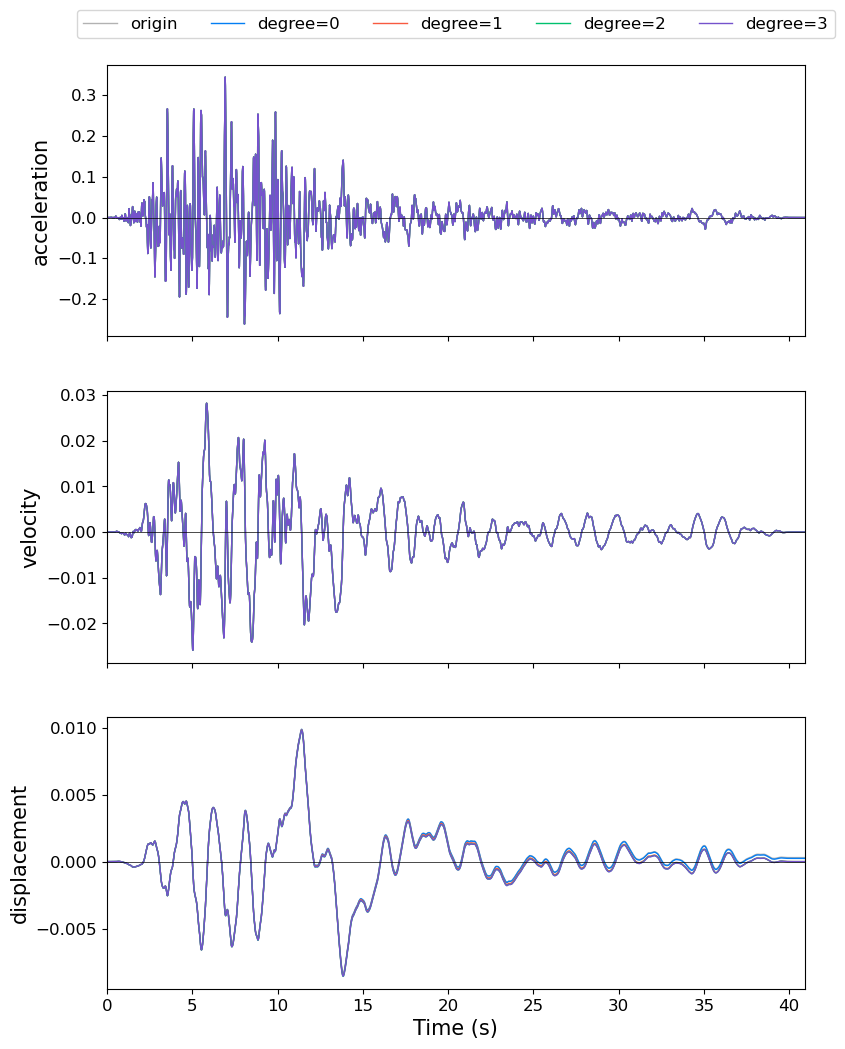

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(9, 12), sharex=True)
for j in range(3):
    ax = axs[j]
    ax.plot(ts, plot_obj_ori[j], c='gray', lw=1, alpha=0.6, label="origin")
    for k, degree in enumerate(degrees):
        ax.plot(ts,
                plot_obj_corr[k][j],
                c=colors[k],
                lw=1,
                label=f"degree={degree}")
    ax.hlines(0, np.min(ts), np.max(ts), lw=0.5, colors='k')
    ax.set_xlim(np.min(ts), np.max(ts))
    ax.grid(False)
    ax.set_ylabel(titles[j], fontsize=15)
    ax.tick_params(labelsize=12)
axs[0].legend(fontsize=12, ncol=5, loc='center', bbox_to_anchor=(0.5, 1.15))
axs[-1].set_xlabel("Time (s)", fontsize=15)
plt.show()